In [4]:
import numpy, scipy, matplotlib
import geopandas as gpd
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Import Megan's SnowEx SWE data
url = "https://gist.githubusercontent.com/meganmason/40a87840b52c5516efc716236a67ccf3/raw/9767072779ac6f22d13e5e4dbf2c7e85f3e6e15e/SNEX20_TS_SP_cogm_swe.geojson"
gdf = gpd.read_file(url)
# gdf.head()
# gdf.columns

/srv/conda/envs/notebook/lib/python3.10/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname T identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
/srv/conda/envs/notebook/lib/python3.10/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname T identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
/srv/conda/envs/notebook/lib/python3.10/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname T identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.war

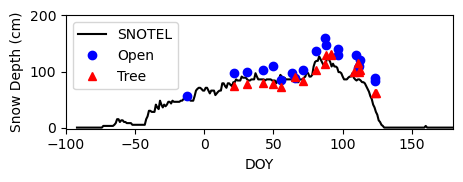

In [20]:
### Plot SnowDepth
data_flg = 'Snow Depth (cm)'

### Organize array
site_flg = 'Skyway Tree'

site = gdf.loc[gdf['Site'] == site_flg].reset_index()
date = site[['Date/Local Standard Time']] # extract date
data = site[[data_flg]]                   # extract swe
date_num = date.to_numpy()                # pandas.core.frame.DataFrame -> numpy.ndarray
data_num = data.to_numpy()                # pandas.core.frame.DataFrame -> numpy.ndarray

doy_arr = np.zeros(len(date))
data_arr = np.zeros(len(date))
for ii in range(0,len(date)):
    date_str = np.array2string(date_num[ii]) # numpy.ndarray -> str
    date_str_sh = date_str[2:21]             # extract necessary #s
    ts = pd.Timestamp(date_str_sh)
    ts_jan1 = pd.Timestamp(date_str_sh[0:4]+'-01-01-01T00:00:00')
    doy_arr[ii] = ts.to_julian_date() - ts_jan1.to_julian_date()
    if doy_arr[ii] > 210:
        doy_arr[ii] = doy_arr[ii]-365
    
    a = np.array(data_num[ii])
    data_arr[ii] = a.item()

# Import data
yData = numpy.array(data_arr)
xData = numpy.array(doy_arr)

##########################################################

site_flg = 'Skyway Open'

site = gdf.loc[gdf['Site'] == site_flg].reset_index()
date = site[['Date/Local Standard Time']] # extract date
data = site[[data_flg]]                   # extract swe
date_num = date.to_numpy()                # pandas.core.frame.DataFrame -> numpy.ndarray
data_num = data.to_numpy()                # pandas.core.frame.DataFrame -> numpy.ndarray

doy_arr = np.zeros(len(date))
data_arr = np.zeros(len(date))
for ii in range(0,len(date)):
    date_str = np.array2string(date_num[ii]) # numpy.ndarray -> str
    date_str_sh = date_str[2:21]             # extract necessary #s
    ts = pd.Timestamp(date_str_sh)
    ts_jan1 = pd.Timestamp(date_str_sh[0:4]+'-01-01-01T00:00:00')
    doy_arr[ii] = ts.to_julian_date() - ts_jan1.to_julian_date()
    if doy_arr[ii] > 210:
        doy_arr[ii] = doy_arr[ii]-365
    
    a = np.array(data_num[ii])
    data_arr[ii] = a.item()

# Import data
yData2 = numpy.array(data_arr)
xData2 = numpy.array(doy_arr)
##########################################################

### Import SNOTEL_SWE
# Import data
site_flg = 'SNOTEL.Mesa Lakes 2000'

df = pd.read_csv (r'SNOTEL_SD.Mesa_Lakes2020.csv')
data_flg = 'Snow Depth (cm)'

data = df[[data_flg]]  
data_num = data.to_numpy()                # pandas.core.frame.DataFrame -> numpy.ndarray 
data_arr = np.zeros(len(data))
for ii in range(0,len(data)):
    a = np.array(data_num[ii])
    data_arr[ii] = a.item()   
    
ts = pd.Timestamp('2019-10-01-01T00:00:00') 
ts_jan1 = pd.Timestamp('2019-01-01-01T00:00:00')
doy_arr = (ts.to_julian_date() - ts_jan1.to_julian_date()) + range(len(data_arr))
for ii in range(0,len(data)):
        doy_arr[ii] = doy_arr[ii]-365

yData3 = numpy.array(data_arr)
xData3 = numpy.array(doy_arr)
##########################################################

# graphics output section
def ModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    # first the raw data as a scatter plot
    axes.plot(xData3, yData3,  '-k') # SNOTEL    
    axes.plot(xData2, yData2,  'ob') # Skyway Open
    axes.plot(xData, yData,  '^r')   # Skyway Tree    

    plt.xlabel('DOY')
    plt.ylabel(data_flg)
    #plt.title(site_flg)
    plt.ylim(-2, 200)
    plt.xlim(-100, 180)
    
    axes.legend(['SNOTEL', 'Open', 'Tree'], loc='upper left')
    
    plt.show()
    plt.close('all') # clean up after using pyplot

graphWidth = 500
graphHeight = 150
ModelAndScatterPlot(graphWidth, graphHeight)    